In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

from LFC.Hardware.SRS_SIM900 import SRS_SIM900, SRS_PIDcontrol_SIM960
from LFC.Hardware.Waveshaper import Waveshaper
from LFC.Hardware.AndoOSA_AQ6315E import AndoOSA_AQ6315E
from LFC.Hardware.PritelAmp import PritelAmp
from LFC.Hardware.ORIONLaser import ORIONLaser
from LFC.Hardware.AmonicsEDFA import AmonicsEDFA
from LFC.Hardware.InstekGppDCSupply import InstekGppDCSupply
from LFC.Hardware.InstekGPD_4303S import InstekGPD_4303S
from LFC.Hardware.TEC_LFC3751 import TEC_LFC3751
from LFC.Hardware.TEC_LDT5525B import TEC_LDT5525B
from LFC.Hardware.PendulumCNT90 import PendulumCNT90
from LFC.Hardware.OZopticsVOA import OZopticsVOA

In [10]:
from LFC.Hardware.TEC_TC720 import TEC_TC720
# tec_PPLN = TEC_TC720(addr='ASRL46::INSTR')
tec_wg = TEC_TC720(addr='COM8', name='Octave Waveguide TEC (TC720)')
tec_wg.connect()

tec_ppln = TEC_TC720(addr='COM46', name='PPLN Doubler TEC (TC720)')
tec_ppln.connect()

Octave Waveguide TEC (TC720) connected
PPLN Doubler TEC (TC720) connected


1

In [11]:
tec_wg.get_temp()

22.99

In [1]:
from LFC.Hardware.SRS_SIM900 import SRS_SIM900, SRS_PIDcontrol_SIM960
srs = SRS_SIM900(addr='GPIB0::2::INSTR')
srs.connect()
servo1 = SRS_PIDcontrol_SIM960(srs, 1, name='Filter Cavity PDH Lock Servo')
servo2 = SRS_PIDcontrol_SIM960(srs, 3, name='Minicomb Intensity Lock Servo')
servo3 = SRS_PIDcontrol_SIM960(srs, 5, name='Rio Laser Fceo Rb spectroscopy Lock Servo')

2023-07-21 10:34:31.263 | INFO     | Device | Device.py:<module>:44
logger initialized
2023-07-21 10:34:33.163 | INFO     | Stanford Research System SIM900 | Device.py:connect:71
Stanford Research System SIM900 connected


In [38]:
servo2.printStatus()

--------------------------Minicomb Intensity Lock Servo--------------------------
|--------------------SRS PID controller SIM960 Status Summary--------------------
|----------------------------SIM960,s/n033669,ver2.17----------------------------
|	Output mode:	MAN,	Output limit: -2.970V TO 3.000V
|	Measured input:	 0.300608V
|	Amplified error:	 99.999999V
|	Instant Output voltage:	 -1.359524V
|	Manual output set:	 -1.36V
|	================ Set Point related================
|		Internal setpoint = 1.77 V, Ramping OFF
|		Setpoint input mode INT, Ext setpoint input 1.769536V
|		Setpoint RAMP speed = 0.01 V/s, action OFF
|	============= P,I,D and Offset Status=============
|		 P = 10.0    , 	action = ON
|		 I = 0.1 1/s, 	action = OFF
|		 D = 1e-05   s, 	action = OFF
|		Off = -0.02  V, 	action = ON
-----------------SRS PID controller SIM960 Status Summary Ends------------------



'--------------------------Minicomb Intensity Lock Servo--------------------------\n|--------------------SRS PID controller SIM960 Status Summary--------------------\n|----------------------------SIM960,s/n033669,ver2.17----------------------------\n|\tOutput mode:\t\x1bMAN\x1b,\tOutput limit: -2.970V TO 3.000V\n|\tMeasured input:\t 0.300608V\n|\tAmplified error:\t 99.999999V\n|\tInstant Output voltage:\t -1.359524V\n|\tManual output set:\t -1.36V\n|\t================ Set Point related================\n|\t\tInternal setpoint = 1.77 V, Ramping \x1bOFF\x1b\n|\t\tSetpoint input mode INT, Ext setpoint input 1.769536V\n|\t\tSetpoint RAMP speed = 0.01 V/s, action \x1bOFF\x1b\n|\t============= P,I,D and Offset Status=============\n|\t\t P = 10.0    , \taction = \x1bON\x1b\n|\t\t I = 0.1 1/s, \taction = \x1bOFF\x1b\n|\t\t D = 1e-05   s, \taction = \x1bOFF\x1b\n|\t\tOff = -0.02  V, \taction = \x1bON\x1b\n-----------------SRS PID controller SIM960 Status Summary Ends------------------\n'

In [63]:
from LFC.Hardware.InstekGPD_4303S import InstekGPD_4303S
rfoscPS = InstekGPD_4303S(addr='ASRL5::INSTR', name='RF oscilator PS, CH2 15V, CH3 1V')
rfoscPS.connect()
rfoscPS.printStatus()

RF oscilator PS, CH2 15V, CH3 1V connected
-------------------------RF oscilator PS, CH2 15V, CH3 1V------------------------
|----------------Instek DC Power Supply GPD-4303S Status Summary-----------------
|--------------------Model: GPD-4303S, Serial No.SN:EV884423---------------------
|	Master Activation: ON
|	------------Channel Summary-------------
|	 CH1: master, CH2: slave, mode UNRECOGNIZED?.
|	 CHANNEL1: CC Mode.
|		 VSET=0.000V, ISET=0.000A.
|		 VOUT=0.000V, IOUT=0.000A.
|		 Output power: 0.000W.
|	 CHANNEL2: CV Mode.
|		 VSET=15.000V, ISET=3.000A.
|		 VOUT=14.994V, IOUT=0.432A.
|		 Output power: 6.477W.
|	 CHANNEL3: CV Mode.
|		 VSET=0.883V, ISET=1.000A.
|		 VOUT=0.883V, IOUT=0.002A.
|		 Output power: 0.002W.
|	 CHANNEL4: CV Mode.
|		 VSET=0.000V, ISET=0.000A.
|		 VOUT=0.000V, IOUT=0.001A.
|		 Output power: 0.000W.
--------------Instek DC Power Supply GPD-4303S Status Summary Ends--------------



'-------------------------RF oscilator PS, CH2 15V, CH3 1V------------------------\n|----------------Instek DC Power Supply GPD-4303S Status Summary-----------------\n|--------------------Model: GPD-4303S, Serial No.SN:EV884423---------------------\n|\tMaster Activation: \x1bON\x1b\n|\t------------Channel Summary-------------\n|\t CH1: master, CH2: slave, mode UNRECOGNIZED?.\n|\t CHANNEL1: CC Mode.\n|\t\t VSET=0.000V, ISET=0.000A.\n|\t\t VOUT=0.000V, IOUT=0.000A.\n|\t\t Output power: 0.000W.\n|\t CHANNEL2: CV Mode.\n|\t\t VSET=15.000V, ISET=3.000A.\n|\t\t VOUT=14.994V, IOUT=0.432A.\n|\t\t Output power: 6.477W.\n|\t CHANNEL3: CV Mode.\n|\t\t VSET=0.883V, ISET=1.000A.\n|\t\t VOUT=0.883V, IOUT=0.002A.\n|\t\t Output power: 0.002W.\n|\t CHANNEL4: CV Mode.\n|\t\t VSET=0.000V, ISET=0.000A.\n|\t\t VOUT=0.000V, IOUT=0.001A.\n|\t\t Output power: 0.000W.\n--------------Instek DC Power Supply GPD-4303S Status Summary Ends--------------\n'

In [69]:
rfoscPS.beep()

1

: 

In [68]:
rfoscPS.activation = 0

Instek GPD-4303S DCSupply: Output activation is turned OFF.


In [3]:
rfoscPS.beep()

1

In [67]:
rfampPS.activation1 = 0

RF amplifier PS 30V 4A: channel 1 output is turned OFF


In [65]:
from LFC.Hardware.InstekGppDCSupply import InstekGppDCSupply
rfampPS = InstekGppDCSupply(addr='ASRL34::INSTR', name='RF amplifier PS 30V 4A')
rfampPS.connect()
rfampPS.printStatus()

RF amplifier PS 30V 4A connected
------------------------------RF amplifier PS 30V 4A-----------------------------
|-------------------Instek GPP DC Power Supply Status Summary--------------------
|--------------------Model: GPP-1326, Serial No.SN:GET921679---------------------
|	------------Channel Summary-------------
|	 CHANNEL1: Activation ON.
|		 VSET=30.000V, ISET=6.000A.
|		 VOUT=29.996V, IOUT=4.090A.
|		 Output power: 122.699W.
|		 ---Over Voltage/Current Protection Status:---
|		 OVP Status: OFF	 OCP Status: OFF 
|		 OVP Level : 35.0 V	 OCP Level : 7.0 A
-----------------Instek GPP DC Power Supply Status Summary Ends-----------------



'------------------------------RF amplifier PS 30V 4A-----------------------------\n|-------------------Instek GPP DC Power Supply Status Summary--------------------\n|--------------------Model: GPP-1326, Serial No.SN:GET921679---------------------\n|\t------------Channel Summary-------------\n|\t CHANNEL1: Activation \x1bON\x1b.\n|\t\t VSET=30.000V, ISET=6.000A.\n|\t\t VOUT=29.996V, IOUT=4.090A.\n|\t\t Output power: 122.699W.\n|\t\t ---Over Voltage/Current Protection Status:---\n|\t\t OVP Status: OFF\t OCP Status: OFF \n|\t\t OVP Level : 35.0 V\t OCP Level : 7.0 A\n-----------------Instek GPP DC Power Supply Status Summary Ends-----------------\n'

In [61]:
from LFC.Hardware.AmonicsEDFA import AmonicsEDFA
amonic27 = AmonicsEDFA(addr='ASRL7::INSTR', name='Amonics EDFA 27 dBm')
amonic27.connect()
amonic27.printStatus()

Amonics EDFA 27 dBm connected
-------------------------------Amonics EDFA 27 dBm-------------------------------
|--------------------------Amonics EDFA Status Summary---------------------------
|------------------Model: AEDFA-PM-27-R-FA, Serial No.21082531-------------------
|	InterLock Status: UNLOCKED
|	Case Temperature: 31.00°C
|	Master Activation: OFF
|	------------Channel Summary-------------
|	 CHANNEL1: 
|		 Mode: APC
|		 Set Pwr: 450.0 mW
|		 Status: OFF
|		 Input Power: 14.02972 mW
|		 Output Power: 0.0 mW
|		 Internal PD Power: 0.0 mW
------------------------Amonics EDFA Status Summary Ends------------------------



'-------------------------------Amonics EDFA 27 dBm-------------------------------\n|--------------------------Amonics EDFA Status Summary---------------------------\n|------------------Model: AEDFA-PM-27-R-FA, Serial No.21082531-------------------\n|\tInterLock Status: \x1bUNLOCKED\x1b\n|\tCase Temperature: 31.00°C\n|\tMaster Activation: \x1bOFF\x1b\n|\t------------Channel Summary-------------\n|\t CHANNEL1: \n|\t\t Mode: APC\n|\t\t Set Pwr: 450.0 mW\n|\t\t Status: \x1bOFF\x1b\n|\t\t Input Power: 14.02972 mW\n|\t\t Output Power: 0.0 mW\n|\t\t Internal PD Power: 0.0 mW\n------------------------Amonics EDFA Status Summary Ends------------------------\n'

In [59]:
amonic27.activation = 0

Amonics EDFA 27 dBm: ......waiting Activation status set to OFF, now ON
Amonics EDFA 27 dBm: setted Activation status as OFF, finished in 0.106 seconds


In [60]:
amonic27.accCh1Status = 0

Amonics EDFA 27 dBm: ......waiting APC CH1 status set to OFF, now ON
Amonics EDFA 27 dBm: setted APC CH1 status as OFF, finished in 0.080 seconds


In [29]:
from LFC.Hardware.Agilent_86142B import Agilent_86142B
osa = Agilent_86142B(addr='GPIB0::30::INSTR', name='Agilent OSA 86142B')

osa.connect()
osa.wlstop = 1568

Agilent OSA 86142B connected
Agilent OSA 86142B: Scan stop wavelength set to 1568.00 nm.


In [49]:
osa.wlspan = 12

Agilent OSA 86142B: Scan start wavelength set to 1554.12 nm.
Agilent OSA 86142B: Scan stop wavelength set to 1566.12 nm.
Agilent OSA 86142B: Scan span wavelength set to 12.00 nm.


In [36]:
osa.wlstart = 1558
osa.wlstop = 1562.25

Agilent OSA 86142B: Scan start wavelength set to 1558.00 nm.
Agilent OSA 86142B: Scan stop wavelength set to 1562.25 nm.


In [32]:
osa.reflevel = 10

Agilent OSA 86142B: Reference level set to 10.0 dBm.


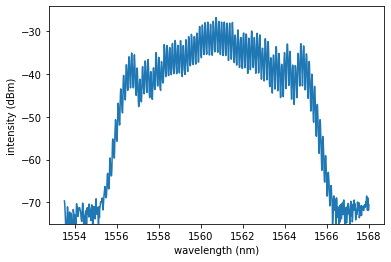

Agilent 86142B: Trace A data is collected and is shown in the plot.
Agilent 86142B: Trace A data is saved to C:\Users\HSFLFC\Desktop\Keck\Commission_test\FilterCavity_finetun\FC_Trans_15.996480000 GHz.mat
Agilent 86142B: Trace A data is saved to C:\Users\HSFLFC\Desktop\Keck\Commission_test\FilterCavity_finetun\FC_Trans_15.996480000 GHz.txt


In [156]:

filedir = r'C:\Users\HSFLFC\Desktop\Keck\Commission_test\FilterCavity_finetun'
freq = cnt90.measFreq('c')/1e9

osa.save_trace('a', filedir+f'\\FC_Trans_{freq:.9f} GHz')

# osa.save_trace('a', filedir+f'{freq:.9f} GHz')

In [8]:
osa.Run()

Agilent OSA 86142B: Spectrum collection RUN (repeat) start.


In [1]:
from LFC.Hardware.ORIONLaser import ORIONLaser
rio = ORIONLaser(addr='ASRL55::INSTR')
rio.connect()
rio.printStatus()


ORION Laser Module connected
0
1
0
-----------------------ORION Laser Module Status Summary------------------------
-------------Product ID: RIO0175-5-01-4-AW2, Ver 0.11.7, SN: 806734-------------
|	 Status Code: bytearray(b'\x00\x01\x00\x01\x00\x01')
|	 Photo monitor voltage: 1.096 Volt (also mA, r=1kOhm)
|	 Board Temp:   18.9257 °C
|	 Thermis Temp: 18.6905 °C
|	 Volatile Settings (reset to non-volatile after re-plug): 
|		 Diode Cur = 150.0000 mA, TEC Set = 18.931°C
|	 Non Volatile Settings (Doesn't reset after re-plug): 
|		 Diode Cur = 150.0000 mA, TEC Set = 19.181°C
---------------------ORION Laser Module Status Summary Ends---------------------


"-----------------------ORION Laser Module Status Summary------------------------\n-------------Product ID: RIO0175-5-01-4-AW2, Ver 0.11.7, SN: 806734-------------\n|\t Status Code: bytearray(b'\\x00\\x01\\x00\\x01\\x00\\x01')\n|\t Photo monitor voltage: 1.096 Volt (also mA, r=1kOhm)\n|\t Board Temp:   18.9257 °C\n|\t Thermis Temp: 18.6905 °C\n|\t Volatile Settings (reset to non-volatile after re-plug): \n|\t\t Diode Cur = 150.0000 mA, TEC Set = 18.931°C\n|\t Non Volatile Settings (Doesn't reset after re-plug): \n|\t\t Diode Cur = 150.0000 mA, TEC Set = 19.181°C\n---------------------ORION Laser Module Status Summary Ends---------------------"

In [5]:
rio.writeTECsetpoint(18.921)
rio.printStatus()

0
1
0
-----------------------ORION Laser Module Status Summary------------------------
-------------Product ID: RIO0175-5-01-4-AW2, Ver 0.11.7, SN: 806734-------------
|	 Status Code: bytearray(b'\x00\x01\x00\x01\x00\x01')
|	 Photo monitor voltage: 1.109 Volt (also mA, r=1kOhm)
|	 Board Temp:   18.3486 °C
|	 Thermis Temp: 18.7250 °C
|	 Volatile Settings (reset to non-volatile after re-plug): 
|		 Diode Cur = 150.0000 mA, TEC Set = 18.921°C
|	 Non Volatile Settings (Doesn't reset after re-plug): 
|		 Diode Cur = 150.0000 mA, TEC Set = 19.181°C
---------------------ORION Laser Module Status Summary Ends---------------------


"-----------------------ORION Laser Module Status Summary------------------------\n-------------Product ID: RIO0175-5-01-4-AW2, Ver 0.11.7, SN: 806734-------------\n|\t Status Code: bytearray(b'\\x00\\x01\\x00\\x01\\x00\\x01')\n|\t Photo monitor voltage: 1.109 Volt (also mA, r=1kOhm)\n|\t Board Temp:   18.3486 °C\n|\t Thermis Temp: 18.7250 °C\n|\t Volatile Settings (reset to non-volatile after re-plug): \n|\t\t Diode Cur = 150.0000 mA, TEC Set = 18.921°C\n|\t Non Volatile Settings (Doesn't reset after re-plug): \n|\t\t Diode Cur = 150.0000 mA, TEC Set = 19.181°C\n---------------------ORION Laser Module Status Summary Ends---------------------"

In [ ]:
rio.writeLaserdiodeCur_mA(155)

In [8]:
rio.writeLaserdiodeCur_mA(150, volatile=False)
rio.writeTECsetpoint(19.181, volatile=False)
rio.printStatus()


0
1
0
-----------------------ORION Laser Module Status Summary------------------------
-------------Product ID: RIO0175-5-01-4-AW2, Ver 0.11.7, SN: 806734-------------
|	 Status Code: bytearray(b'\x00\x01\x00\x01\x00\x01')
|	 Photo monitor voltage: 1.055 Volt (also mA, r=1kOhm)
|	 Board Temp:   18.1475 °C
|	 Thermis Temp: 18.9047 °C
|	 Volatile Settings (reset to non-volatile after re-plug): 
|		 Diode Cur = 150.0000 mA, TEC Set = 19.181°C
|	 Non Volatile Settings (Doesn't reset after re-plug): 
|		 Diode Cur = 150.0000 mA, TEC Set = 19.181°C
---------------------ORION Laser Module Status Summary Ends---------------------


"-----------------------ORION Laser Module Status Summary------------------------\n-------------Product ID: RIO0175-5-01-4-AW2, Ver 0.11.7, SN: 806734-------------\n|\t Status Code: bytearray(b'\\x00\\x01\\x00\\x01\\x00\\x01')\n|\t Photo monitor voltage: 1.055 Volt (also mA, r=1kOhm)\n|\t Board Temp:   18.1475 °C\n|\t Thermis Temp: 18.9047 °C\n|\t Volatile Settings (reset to non-volatile after re-plug): \n|\t\t Diode Cur = 150.0000 mA, TEC Set = 19.181°C\n|\t Non Volatile Settings (Doesn't reset after re-plug): \n|\t\t Diode Cur = 150.0000 mA, TEC Set = 19.181°C\n---------------------ORION Laser Module Status Summary Ends---------------------"

In [23]:
rfoscPS.printStatus()

-------------------------RF oscilator PS, CH2 15V, CH3 1V------------------------
|----------------Instek DC Power Supply GPD-4303S Status Summary-----------------
|--------------------Model: GPD-4303S, Serial No.SN:EV884423---------------------
|	Master Activation: OFF
|	------------Channel Summary-------------
|	 CH1: master, CH2: slave, mode UNRECOGNIZED?.
|	 CHANNEL1: CC Mode.
|		 VSET=0.000V, ISET=0.000A.
|		 VOUT=0.000V, IOUT=0.000A.
|		 Output power: 0.000W.
|	 CHANNEL2: CC Mode.
|		 VSET=15.000V, ISET=3.000A.
|		 VOUT=0.000V, IOUT=0.000A.
|		 Output power: 0.000W.
|	 CHANNEL3: CC Mode.
|		 VSET=0.950V, ISET=1.000A.
|		 VOUT=0.000V, IOUT=0.000A.
|		 Output power: 0.000W.
|	 CHANNEL4: CV Mode.
|		 VSET=0.000V, ISET=0.000A.
|		 VOUT=0.000V, IOUT=0.000A.
|		 Output power: 0.000W.
--------------Instek DC Power Supply GPD-4303S Status Summary Ends--------------



'-------------------------RF oscilator PS, CH2 15V, CH3 1V------------------------\n|----------------Instek DC Power Supply GPD-4303S Status Summary-----------------\n|--------------------Model: GPD-4303S, Serial No.SN:EV884423---------------------\n|\tMaster Activation: \x1bOFF\x1b\n|\t------------Channel Summary-------------\n|\t CH1: master, CH2: slave, mode UNRECOGNIZED?.\n|\t CHANNEL1: CC Mode.\n|\t\t VSET=0.000V, ISET=0.000A.\n|\t\t VOUT=0.000V, IOUT=0.000A.\n|\t\t Output power: 0.000W.\n|\t CHANNEL2: CC Mode.\n|\t\t VSET=15.000V, ISET=3.000A.\n|\t\t VOUT=0.000V, IOUT=0.000A.\n|\t\t Output power: 0.000W.\n|\t CHANNEL3: CC Mode.\n|\t\t VSET=0.950V, ISET=1.000A.\n|\t\t VOUT=0.000V, IOUT=0.000A.\n|\t\t Output power: 0.000W.\n|\t CHANNEL4: CV Mode.\n|\t\t VSET=0.000V, ISET=0.000A.\n|\t\t VOUT=0.000V, IOUT=0.000A.\n|\t\t Output power: 0.000W.\n--------------Instek DC Power Supply GPD-4303S Status Summary Ends--------------\n'

In [158]:
rfoscPS.activation = 1

Instek GPD-4303S DCSupply: Output activation is turned ON.


In [30]:
for ii in range(100):
    print(rfoscPS.Iout2)
    import time
    time.sleep(0.1)


0.483
0.483
0.477
0.468
0.456
0.443
0.443
0.43
0.418
0.409
0.402
0.402
0.397
0.396
0.397
0.401
0.401
0.407
0.413
0.42
0.426
0.426
0.432
0.437
0.44
0.441
0.441
0.441
0.44
0.437
0.434
0.434
0.43
0.427
0.424
0.421
0.421
0.419
0.418
0.418
0.418
0.418
0.419
0.421
0.423
0.425
0.425
0.426
0.428
0.429
0.43
0.43
0.43
0.43
0.429
0.428
0.428
0.427
0.426
0.425
0.424
0.424
0.424
0.423
0.423
0.423
0.423
0.423
0.424
0.424
0.425
0.425
0.425
0.426
0.426
0.426
0.426
0.427
0.427
0.426
0.426
0.426
0.426
0.425
0.425
0.425
0.425
0.425
0.425
0.425
0.425
0.425
0.425
0.425
0.425
0.425
0.425
0.425
0.425
0.425


In [31]:
rfampPS.activation1 = 1

RF amplifier PS 30V 4A: channel 1 output is turned ON


In [33]:
rfampPS.printStatus()

------------------------------RF amplifier PS 30V 4A-----------------------------
|-------------------Instek GPP DC Power Supply Status Summary--------------------
|--------------------Model: GPP-1326, Serial No.SN:GET921679---------------------
|	------------Channel Summary-------------
|	 CHANNEL1: Activation ON.
|		 VSET=30.000V, ISET=6.000A.
|		 VOUT=29.997V, IOUT=4.086A.
|		 Output power: 122.562W.
|		 ---Over Voltage/Current Protection Status:---
|		 OVP Status: OFF	 OCP Status: OFF 
|		 OVP Level : 35.0 V	 OCP Level : 7.0 A
-----------------Instek GPP DC Power Supply Status Summary Ends-----------------



'------------------------------RF amplifier PS 30V 4A-----------------------------\n|-------------------Instek GPP DC Power Supply Status Summary--------------------\n|--------------------Model: GPP-1326, Serial No.SN:GET921679---------------------\n|\t------------Channel Summary-------------\n|\t CHANNEL1: Activation \x1bON\x1b.\n|\t\t VSET=30.000V, ISET=6.000A.\n|\t\t VOUT=29.997V, IOUT=4.086A.\n|\t\t Output power: 122.562W.\n|\t\t ---Over Voltage/Current Protection Status:---\n|\t\t OVP Status: OFF\t OCP Status: OFF \n|\t\t OVP Level : 35.0 V\t OCP Level : 7.0 A\n-----------------Instek GPP DC Power Supply Status Summary Ends-----------------\n'

In [137]:
amonic27.modeCh1 = 'APC'
amonic27.accCh1Cur = 450
amonic27.printStatus()

Amonics EDFA 27 dBm: CH1 mode set as APC
Amonics EDFA 27 dBm: setted APC mode CH1 current as 450.0 mW.
-------------------------------Amonics EDFA 27 dBm-------------------------------
|--------------------------Amonics EDFA Status Summary---------------------------
|------------------Model: AEDFA-PM-27-R-FA, Serial No.21082531-------------------
|	InterLock Status: UNLOCKED
|	Case Temperature: 28.56°C
|	Master Activation: OFF
|	------------Channel Summary-------------
|	 CHANNEL1: 
|		 Mode: APC
|		 Set Pwr: 450.0 mW
|		 Status: OFF
|		 Input Power: 14.51131 mW
|		 Output Power: 0.0 mW
|		 Internal PD Power: 0.0 mW
------------------------Amonics EDFA Status Summary Ends------------------------



'-------------------------------Amonics EDFA 27 dBm-------------------------------\n|--------------------------Amonics EDFA Status Summary---------------------------\n|------------------Model: AEDFA-PM-27-R-FA, Serial No.21082531-------------------\n|\tInterLock Status: \x1bUNLOCKED\x1b\n|\tCase Temperature: 28.56°C\n|\tMaster Activation: \x1bOFF\x1b\n|\t------------Channel Summary-------------\n|\t CHANNEL1: \n|\t\t Mode: APC\n|\t\t Set Pwr: 450.0 mW\n|\t\t Status: \x1bOFF\x1b\n|\t\t Input Power: 14.51131 mW\n|\t\t Output Power: 0.0 mW\n|\t\t Internal PD Power: 0.0 mW\n------------------------Amonics EDFA Status Summary Ends------------------------\n'

In [138]:
amonic27.accCh1Status = 1
amonic27.activation = 1
import time
time.sleep(5)
amonic27.printStatus()

Amonics EDFA 27 dBm: ......waiting APC CH1 status set to ON, now OFF
Amonics EDFA 27 dBm: setted APC CH1 status as ON, finished in 0.080 seconds
Amonics EDFA 27 dBm: ACTIVATING LASER OUTPUT, MAKE SURE SEED INPUT POWER IS APPROPRIATE TO AVOID DAMAGE
Amonics EDFA 27 dBm: ......waiting Activation status set to ON, now OFF
Amonics EDFA 27 dBm: setted Activation status as ON, finished in 0.079 seconds
-------------------------------Amonics EDFA 27 dBm-------------------------------
|--------------------------Amonics EDFA Status Summary---------------------------
|------------------Model: AEDFA-PM-27-R-FA, Serial No.21082531-------------------
|	InterLock Status: UNLOCKED
|	Case Temperature: 28.54°C
|	Master Activation: ON
|	------------Channel Summary-------------
|	 CHANNEL1: 
|		 Mode: APC
|		 Set Pwr: 450.0 mW
|		 Status: ON
|		 Input Power: 14.47055 mW
|		 Output Power: 406.5257 mW
|		 Internal PD Power: 330.9595 mW
------------------------Amonics EDFA Status Summary Ends---------------

'-------------------------------Amonics EDFA 27 dBm-------------------------------\n|--------------------------Amonics EDFA Status Summary---------------------------\n|------------------Model: AEDFA-PM-27-R-FA, Serial No.21082531-------------------\n|\tInterLock Status: \x1bUNLOCKED\x1b\n|\tCase Temperature: 28.54°C\n|\tMaster Activation: \x1bON\x1b\n|\t------------Channel Summary-------------\n|\t CHANNEL1: \n|\t\t Mode: APC\n|\t\t Set Pwr: 450.0 mW\n|\t\t Status: \x1bON\x1b\n|\t\t Input Power: 14.47055 mW\n|\t\t Output Power: 406.5257 mW\n|\t\t Internal PD Power: 330.9595 mW\n------------------------Amonics EDFA Status Summary Ends------------------------\n'

In [139]:
amonic27.printStatus()

-------------------------------Amonics EDFA 27 dBm-------------------------------
|--------------------------Amonics EDFA Status Summary---------------------------
|------------------Model: AEDFA-PM-27-R-FA, Serial No.21082531-------------------
|	InterLock Status: UNLOCKED
|	Case Temperature: 28.50°C
|	Master Activation: ON
|	------------Channel Summary-------------
|	 CHANNEL1: 
|		 Mode: APC
|		 Set Pwr: 450.0 mW
|		 Status: ON
|		 Input Power: 14.42991 mW
|		 Output Power: 448.4817 mW
|		 Internal PD Power: 330.9595 mW
------------------------Amonics EDFA Status Summary Ends------------------------



'-------------------------------Amonics EDFA 27 dBm-------------------------------\n|--------------------------Amonics EDFA Status Summary---------------------------\n|------------------Model: AEDFA-PM-27-R-FA, Serial No.21082531-------------------\n|\tInterLock Status: \x1bUNLOCKED\x1b\n|\tCase Temperature: 28.50°C\n|\tMaster Activation: \x1bON\x1b\n|\t------------Channel Summary-------------\n|\t CHANNEL1: \n|\t\t Mode: APC\n|\t\t Set Pwr: 450.0 mW\n|\t\t Status: \x1bON\x1b\n|\t\t Input Power: 14.42991 mW\n|\t\t Output Power: 448.4817 mW\n|\t\t Internal PD Power: 330.9595 mW\n------------------------Amonics EDFA Status Summary Ends------------------------\n'

In [6]:
from LFC.Hardware.Agilent_86142B import Agilent_86142B
osa = Agilent_86142B(addr='GPIB0::30::INSTR')

osa.connect()
# osa.wlstop = 1568

Agilent 86142B connected


1

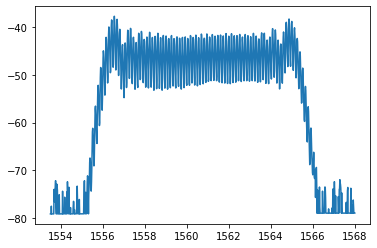

In [69]:
osa.startosa('a')

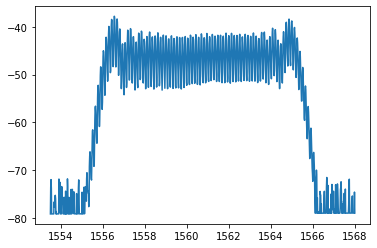

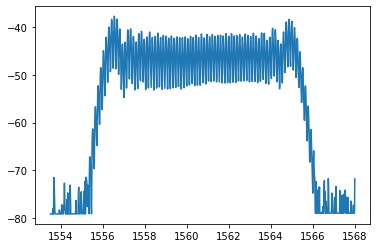

In [70]:
osa.stoposa()

In [52]:
osa.sensitivity = -65

Agilent 86142B: OSA sensitivity set to -65.00 dBm.


In [47]:
osa.reflevel = -10

Agilent 86142B: Reference level set to -10.0 dBm.


In [53]:
osa.wlcenter=1560.5

Agilent 86142B: Scan start wavelength set to 1553.50 nm.
Agilent 86142B: Scan stop wavelength set to 1567.50 nm.
Agilent 86142B: Scan center wavelength set to 1560.50 nm.


In [54]:
rfoscPS.printStatus()

----------------------------Instek GPD-4303S DCSupply----------------------------
|----------------Instek DC Power Supply GPD-4303S Status Summary-----------------
|--------------------Model: GPD-4303S, Serial No.SN:EV884423---------------------
|	Master Activation: ON
|	------------Channel Summary-------------
|	 CH1: master, CH2: slave, mode UNRECOGNIZED?.
|	 CHANNEL1: CC Mode.
|		 VSET=0.000V, ISET=0.000A.
|		 VOUT=0.000V, IOUT=0.002A.
|		 Output power: 0.000W.
|	 CHANNEL2: CV Mode.
|		 VSET=15.000V, ISET=3.000A.
|		 VOUT=14.991V, IOUT=0.428A.
|		 Output power: 6.416W.
|	 CHANNEL3: CV Mode.
|		 VSET=1.199V, ISET=1.000A.
|		 VOUT=1.199V, IOUT=0.001A.
|		 Output power: 0.001W.
|	 CHANNEL4: CV Mode.
|		 VSET=0.000V, ISET=0.000A.
|		 VOUT=0.000V, IOUT=0.001A.
|		 Output power: 0.000W.
--------------Instek DC Power Supply GPD-4303S Status Summary Ends--------------



'----------------------------Instek GPD-4303S DCSupply----------------------------\n|----------------Instek DC Power Supply GPD-4303S Status Summary-----------------\n|--------------------Model: GPD-4303S, Serial No.SN:EV884423---------------------\n|\tMaster Activation: \x1bON\x1b\n|\t------------Channel Summary-------------\n|\t CH1: master, CH2: slave, mode UNRECOGNIZED?.\n|\t CHANNEL1: CC Mode.\n|\t\t VSET=0.000V, ISET=0.000A.\n|\t\t VOUT=0.000V, IOUT=0.002A.\n|\t\t Output power: 0.000W.\n|\t CHANNEL2: CV Mode.\n|\t\t VSET=15.000V, ISET=3.000A.\n|\t\t VOUT=14.991V, IOUT=0.428A.\n|\t\t Output power: 6.416W.\n|\t CHANNEL3: CV Mode.\n|\t\t VSET=1.199V, ISET=1.000A.\n|\t\t VOUT=1.199V, IOUT=0.001A.\n|\t\t Output power: 0.001W.\n|\t CHANNEL4: CV Mode.\n|\t\t VSET=0.000V, ISET=0.000A.\n|\t\t VOUT=0.000V, IOUT=0.001A.\n|\t\t Output power: 0.000W.\n--------------Instek DC Power Supply GPD-4303S Status Summary Ends--------------\n'

In [3]:
rfoscPS.activation = 1

NameError: name 'rfoscPS' is not defined

In [60]:
rfoscPS.Vset3 = 0.95

Instek GPD-4303S DCSupply: VSET channel 3 set to 0.950V


In [20]:
from LFC.Hardware.Waveshaper import Waveshaper
ws = Waveshaper()
ws.connect()

Finisar Waveshaper SN201904 connected


1

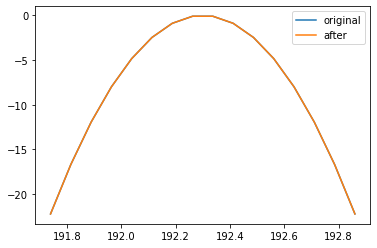

Waveshaper Set interp phase with center 192.17465256410256 THz.
Waveshaper Set atten to BandPass [189.675~194.675] THz ([1580.559~1539.964] nm).
Waveshaper profile write successful.
-------------------Finisar Waveshaper SN201904 Status Summary-------------------
|	 Atten info: Set atten to BandPass [189.675~194.675] THz ([1580.559~1539.964] nm)
|	 Phase info: Set interp phase with center 192.17465256410256 THz
----------------Finisar Waveshaper SN201904 Status Summary Ends-----------------


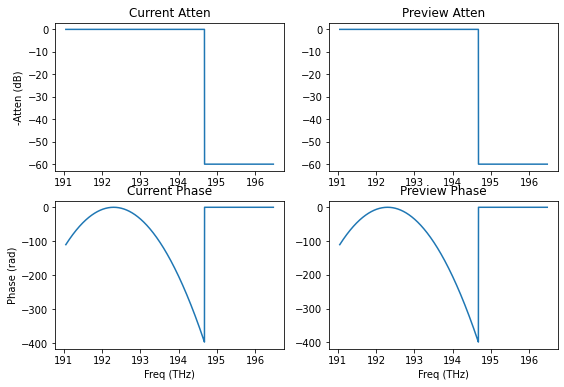

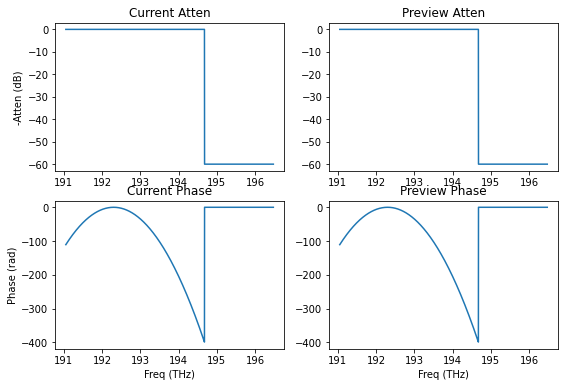

In [47]:

import matplotlib.pyplot as plt
import numpy as np

n_pt = 35
x_freq = np.linspace(192.3-n_pt*16e-3, 192.3+n_pt*16e-3, 16)
y_phase = ((x_freq-192.3) ** 2 * (2*np.pi) ** 2 * 1.3/2*-2.76) + 0/((x_freq-192.3) ** 4 * (2*np.pi) ** 2 * 1.3/2+1)
plt.plot(x_freq, y_phase,label='original')

y_phase[5:11] *= 1
#y_phase[:3] *= 1



plt.plot(x_freq, y_phase,label='after')
plt.legend()
plt.show()


ws.set_interp_phase(x_freq, y_phase)
ws.setBandPass(span=5)
# ws.set2ndDisper(d2=-2.8)
ws.plotStatus()
ws.writeProfile()
ws.printStatus()

In [3]:
from LFC.Hardware.AmonicsEDFA import AmonicsEDFA
amonic13= AmonicsEDFA(addr='ASRL4::INSTR', name='Amonics EDFA 13 dBm')
amonic13.connect()
amonic13.printStatus()

Amonics EDFA 13 dBm connected
-------------------------------Amonics EDFA 13 dBm-------------------------------
|--------------------------Amonics EDFA Status Summary---------------------------
|------------------Model: AEDFA-PM-13-R-FA, Serial No.22020701-------------------
|	InterLock Status: UNLOCKED
|	Case Temperature: 29.46°C
|	Master Activation: ON
|	------------Channel Summary-------------
|	 CHANNEL1: 
|		 Mode: ACC
|		 Set Cur: 60.0 mA
|		 Status: ON
|		 Input Power: 1.249001 mW
|		 Output Power: 4.198971 mW
|		 Internal PD Power: 18.61702 mW
------------------------Amonics EDFA Status Summary Ends------------------------



'-------------------------------Amonics EDFA 13 dBm-------------------------------\n|--------------------------Amonics EDFA Status Summary---------------------------\n|------------------Model: AEDFA-PM-13-R-FA, Serial No.22020701-------------------\n|\tInterLock Status: \x1bUNLOCKED\x1b\n|\tCase Temperature: 29.46°C\n|\tMaster Activation: \x1bON\x1b\n|\t------------Channel Summary-------------\n|\t CHANNEL1: \n|\t\t Mode: ACC\n|\t\t Set Cur: 60.0 mA\n|\t\t Status: \x1bON\x1b\n|\t\t Input Power: 1.249001 mW\n|\t\t Output Power: 4.198971 mW\n|\t\t Internal PD Power: 18.61702 mW\n------------------------Amonics EDFA Status Summary Ends------------------------\n'

In [5]:
amonic13.accCh1Cur = 60
amonic13.accCh1Status = 1

Amonics EDFA 13 dBm: setted ACC mode CH1 current as 60.0 mA.
Amonics EDFA 13 dBm: ......waiting ACC CH1 status set to ON, now OFF
Amonics EDFA 13 dBm: setted ACC CH1 status as ON, finished in 0.106 seconds


In [35]:
amonic13.activation = 1

Amonics EDFA 13 dBm: ACTIVATING LASER OUTPUT, MAKE SURE SEED INPUT POWER IS APPROPRIATE TO AVOID DAMAGE
Amonics EDFA 13 dBm: ......waiting Activation status set to ON, now OFF
Amonics EDFA 13 dBm: setted Activation status as ON, finished in 0.080 seconds


In [38]:
amonic13.accCh1Cur = 60

Amonics EDFA 13 dBm: setted ACC mode CH1 current as 60.0 mA.


In [ ]:
# 317 # arduino low, 2 mW


# 741 # adruino high, 4.86mW

In [7]:
from LFC.Hardware.PendulumCNT90 import PendulumCNT90
cnt90 = PendulumCNT90(addr='GPIB0::10::INSTR', name='Pendulum CNT90')
cnt90.connect()

Pendulum CNT90 connected


1

In [8]:
cnt90.measFreq('c')/1e9

15.9967

In [6]:
from LFC.Hardware.PritelAmp import PritelAmp
ptamp = PritelAmp(addr='ASRL6::INSTR', name='Pritel Amp')
ptamp.connect()
ptamp.printStatus()

Pritel Amp connected
------------------------------------Pritel Amp-----------------------------------
|-----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary------------------
|	 Pump status: OFF
|	 InputPower = 0 mW, 	PreAmp = 0 mA
|	 OutputPower = 0.00 W, 	PwrAmp = 0.00 A
|	 AutoShutDown Enabled. PowerAmp pump current is disabled.
----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary Ends---------------



'------------------------------------Pritel Amp-----------------------------------\n|-----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary------------------\n|\t Pump status: \x1bOFF\x1b\n|\t InputPower = 0 mW, \tPreAmp = 0 mA\n|\t OutputPower = 0.00 W, \tPwrAmp = 0.00 A\n|\t AutoShutDown Enabled. PowerAmp pump current is disabled.\n----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary Ends---------------\n'

In [14]:
ptamp.printStatus()

------------------------------------Pritel Amp-----------------------------------
|-----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary------------------
|	 Pump status: ON
|	 InputPower = 135 mW, 	PreAmp = 600 mA
|	 OutputPower = 0.34 W, 	PwrAmp = 0.79 A
|	 AutoShutDown Disabled.
----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary Ends---------------



'------------------------------------Pritel Amp-----------------------------------\n|-----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary------------------\n|\t Pump status: \x1bON\x1b\n|\t InputPower = 135 mW, \tPreAmp = 600 mA\n|\t OutputPower = 0.34 W, \tPwrAmp = 0.79 A\n|\t AutoShutDown Disabled.\n----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary Ends---------------\n'

In [51]:
ptamp.preAmp = '600mA'
ptamp.pwrAmp = '100mA'

ptamp.activation = 1

Pritel Amp: Disable Ramping by self.ramp_pre_ma = 0, now 100 mA.
Pritel Amp: Setting PreAmp Current to 000 mA, current Output 0.00 W.
Pritel Amp: Setting PreAmp Current to 120 mA, current Output 0.00 W.
Pritel Amp: Setting PreAmp Current to 240 mA, current Output 0.00 W.
Pritel Amp: Setting PreAmp Current to 360 mA, current Output 0.00 W.
Pritel Amp: Setting PreAmp Current to 480 mA, current Output 0.00 W.
Pritel Amp: Setting PreAmp Current to 600 mA, current Output 0.00 W.
Pritel Amp: Disable Ramping by self.ramp_pwr_ma = 0, now 50 mA.
Pritel Amp: Setting PowerAmp Current to 0.00 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.10 A, current Output 0.00 W.
Pritel Amp: ACTIVATING LASER PUMP (OUTPUT), MAKE SURE SEED INPUT POWER IS APPROPRIATE TO AVOID DAMAGE.
Pritel Amp: setted Activation status as ON, finished in 0.492 seconds


In [52]:
ptamp.pwrAmp = '3300mA'


Pritel Amp: Disable Ramping by self.ramp_pwr_ma = 0, now 50 mA.
Pritel Amp: Setting PowerAmp Current to 0.00 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.05 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.10 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.15 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.20 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.25 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.30 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.36 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.41 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.46 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.51 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.56 A, current Output 0.00 W.
Pritel Amp: Setting PowerAmp Current to 0.61 A, current Output 0.05 W.
Pritel Amp: S

In [53]:
ptamp.pwrAmp = 0
ptamp.preAmp = 0
ptamp.activation = 0

Pritel Amp: Disable Ramping by self.ramp_pwr_ma = 0, now 50 mA.
Pritel Amp: Setting PowerAmp Current to 3.20 A, current Output 2.90 W.
Pritel Amp: Setting PowerAmp Current to 3.15 A, current Output 2.87 W.
Pritel Amp: Setting PowerAmp Current to 3.10 A, current Output 2.82 W.
Pritel Amp: Setting PowerAmp Current to 3.05 A, current Output 2.76 W.
Pritel Amp: Setting PowerAmp Current to 3.00 A, current Output 2.70 W.
Pritel Amp: Setting PowerAmp Current to 2.95 A, current Output 2.65 W.
Pritel Amp: Setting PowerAmp Current to 2.90 A, current Output 2.59 W.
Pritel Amp: Setting PowerAmp Current to 2.84 A, current Output 2.55 W.
Pritel Amp: Setting PowerAmp Current to 2.79 A, current Output 2.48 W.
Pritel Amp: Setting PowerAmp Current to 2.74 A, current Output 2.43 W.
Pritel Amp: Setting PowerAmp Current to 2.69 A, current Output 2.38 W.
Pritel Amp: Setting PowerAmp Current to 2.64 A, current Output 2.31 W.
Pritel Amp: Setting PowerAmp Current to 2.59 A, current Output 2.26 W.
Pritel Amp: S

In [56]:
amonic13.activation = 1

Amonics EDFA 13 dBm: ACTIVATING LASER OUTPUT, MAKE SURE SEED INPUT POWER IS APPROPRIATE TO AVOID DAMAGE
Amonics EDFA 13 dBm: ......waiting Activation status set to ON, now OFF
Amonics EDFA 13 dBm: setted Activation status as ON, finished in 0.080 seconds


In [48]:
ptamp.printStatus()

------------------------------------Pritel Amp-----------------------------------
|-----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary------------------
|	 Pump status: ON
|	 InputPower = 135 mW, 	PreAmp = 600 mA
|	 OutputPower = 3.09 W, 	PwrAmp = 3.19 A
|	 AutoShutDown Disabled.
----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary Ends---------------



'------------------------------------Pritel Amp-----------------------------------\n|-----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary------------------\n|\t Pump status: \x1bON\x1b\n|\t InputPower = 135 mW, \tPreAmp = 600 mA\n|\t OutputPower = 3.09 W, \tPwrAmp = 3.19 A\n|\t AutoShutDown Disabled.\n----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary Ends---------------\n'

In [47]:
ptamp.pwrAmp = '0A'


Pritel Amp: Disable Ramping by self.ramp_pwr_ma = 0, now 50 mA.
Pritel Amp: Setting PowerAmp Current to 3.50 A, current Output 3.30 W.
Pritel Amp: Setting PowerAmp Current to 3.45 A, current Output 3.27 W.
Pritel Amp: Setting PowerAmp Current to 3.40 A, current Output 3.21 W.
Pritel Amp: Setting PowerAmp Current to 3.35 A, current Output 3.15 W.
Pritel Amp: Setting PowerAmp Current to 3.30 A, current Output 3.09 W.
Pritel Amp: Setting PowerAmp Current to 3.25 A, current Output 3.05 W.
Pritel Amp: Setting PowerAmp Current to 3.20 A, current Output 3.00 W.
Pritel Amp: Setting PowerAmp Current to 3.14 A, current Output 2.94 W.
Pritel Amp: Setting PowerAmp Current to 3.09 A, current Output 2.88 W.
Pritel Amp: Setting PowerAmp Current to 3.04 A, current Output 2.83 W.
Pritel Amp: Setting PowerAmp Current to 2.99 A, current Output 2.77 W.
Pritel Amp: Setting PowerAmp Current to 2.94 A, current Output 2.70 W.
Pritel Amp: Setting PowerAmp Current to 2.89 A, current Output 2.65 W.
Pritel Amp: S

In [48]:
ptamp.preAmp = 0

Pritel Amp: Disable Ramping by self.ramp_pre_ma = 0, now 100 mA.
Pritel Amp: Setting PreAmp Current to 600 mA, current Output 0.00 W.
Pritel Amp: Setting PreAmp Current to 480 mA, current Output 0.00 W.
Pritel Amp: Setting PreAmp Current to 360 mA, current Output 0.00 W.
Pritel Amp: Setting PreAmp Current to 240 mA, current Output 0.00 W.
Pritel Amp: Setting PreAmp Current to 120 mA, current Output 0.00 W.
Pritel Amp: Setting PreAmp Current to 000 mA, current Output 0.00 W.


In [49]:
ptamp.activation = 0

Pritel Amp: setted Activation status as OFF, finished in 0.519 seconds


In [52]:
tec_wg.get_temp()


23.01

In [53]:
ptamp.printStatus()

------------------------------------Pritel Amp-----------------------------------
|-----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary------------------
|	 Pump status: OFF
|	 InputPower = 0 mW, 	PreAmp = 0 mA
|	 OutputPower = 0.00 W, 	PwrAmp = 0.00 A
|	 AutoShutDown Enabled. PowerAmp pump current is disabled.
----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary Ends---------------



'------------------------------------Pritel Amp-----------------------------------\n|-----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary------------------\n|\t Pump status: \x1bOFF\x1b\n|\t InputPower = 0 mW, \tPreAmp = 0 mA\n|\t OutputPower = 0.00 W, \tPwrAmp = 0.00 A\n|\t AutoShutDown Enabled. PowerAmp pump current is disabled.\n----------------Pritel OPTICAL FIBER AMPLIFIER Status Summary Ends---------------\n'

In [62]:
amonic13.printStatus()

-------------------------------Amonics EDFA 13 dBm-------------------------------
|--------------------------Amonics EDFA Status Summary---------------------------
|------------------Model: AEDFA-PM-13-R-FA, Serial No.22020701-------------------
|	InterLock Status: UNLOCKED
|	Case Temperature: 33.31°C
|	Master Activation: OFF
|	------------Channel Summary-------------
|	 CHANNEL1: 
|		 Mode: ACC
|		 Set Cur: 60.0 mA
|		 Status: OFF
|		 Input Power: 1.611732 mW
|		 Output Power: 0.0 mW
|		 Internal PD Power: 0.0 mW
------------------------Amonics EDFA Status Summary Ends------------------------



'-------------------------------Amonics EDFA 13 dBm-------------------------------\n|--------------------------Amonics EDFA Status Summary---------------------------\n|------------------Model: AEDFA-PM-13-R-FA, Serial No.22020701-------------------\n|\tInterLock Status: \x1bUNLOCKED\x1b\n|\tCase Temperature: 33.31°C\n|\tMaster Activation: \x1bOFF\x1b\n|\t------------Channel Summary-------------\n|\t CHANNEL1: \n|\t\t Mode: ACC\n|\t\t Set Cur: 60.0 mA\n|\t\t Status: \x1bOFF\x1b\n|\t\t Input Power: 1.611732 mW\n|\t\t Output Power: 0.0 mW\n|\t\t Internal PD Power: 0.0 mW\n------------------------Amonics EDFA Status Summary Ends------------------------\n'

In [61]:
amonic13.activation = 0
amonic13.accCh1Status = 0

Amonics EDFA 13 dBm: setted Activation status as OFF, finished in 0.026 seconds
Amonics EDFA 13 dBm: ......waiting ACC CH1 status set to OFF, now ON
Amonics EDFA 13 dBm: setted ACC CH1 status as OFF, finished in 0.079 seconds


In [63]:
rfampPS.printStatus()

------------------------------RF amplifier PS 30V 4A-----------------------------
|-------------------Instek GPP DC Power Supply Status Summary--------------------
|--------------------Model: GPP-1326, Serial No.SN:GET921679---------------------
|	------------Channel Summary-------------
|	 CHANNEL1: Activation ON.
|		 VSET=30.000V, ISET=6.000A.
|		 VOUT=29.997V, IOUT=4.101A.
|		 Output power: 123.033W.
|		 ---Over Voltage/Current Protection Status:---
|		 OVP Status: OFF	 OCP Status: OFF 
|		 OVP Level : 35.0 V	 OCP Level : 7.0 A
-----------------Instek GPP DC Power Supply Status Summary Ends-----------------



'------------------------------RF amplifier PS 30V 4A-----------------------------\n|-------------------Instek GPP DC Power Supply Status Summary--------------------\n|--------------------Model: GPP-1326, Serial No.SN:GET921679---------------------\n|\t------------Channel Summary-------------\n|\t CHANNEL1: Activation \x1bON\x1b.\n|\t\t VSET=30.000V, ISET=6.000A.\n|\t\t VOUT=29.997V, IOUT=4.101A.\n|\t\t Output power: 123.033W.\n|\t\t ---Over Voltage/Current Protection Status:---\n|\t\t OVP Status: OFF\t OCP Status: OFF \n|\t\t OVP Level : 35.0 V\t OCP Level : 7.0 A\n-----------------Instek GPP DC Power Supply Status Summary Ends-----------------\n'

In [64]:
rfoscPS.printStatus()

-------------------------RF oscilator PS, CH2 15V, CH3 1V------------------------
|----------------Instek DC Power Supply GPD-4303S Status Summary-----------------
|--------------------Model: GPD-4303S, Serial No.SN:EV884423---------------------
|	Master Activation: ON
|	------------Channel Summary-------------
|	 CH1: master, CH2: slave, mode UNRECOGNIZED?.
|	 CHANNEL1: CC Mode.
|		 VSET=0.000V, ISET=0.000A.
|		 VOUT=0.000V, IOUT=0.001A.
|		 Output power: 0.000W.
|	 CHANNEL2: CV Mode.
|		 VSET=15.000V, ISET=3.000A.
|		 VOUT=14.993V, IOUT=0.426A.
|		 Output power: 6.387W.
|	 CHANNEL3: CV Mode.
|		 VSET=0.950V, ISET=1.000A.
|		 VOUT=0.950V, IOUT=0.002A.
|		 Output power: 0.002W.
|	 CHANNEL4: CV Mode.
|		 VSET=0.000V, ISET=0.000A.
|		 VOUT=0.000V, IOUT=0.001A.
|		 Output power: 0.000W.
--------------Instek DC Power Supply GPD-4303S Status Summary Ends--------------



'-------------------------RF oscilator PS, CH2 15V, CH3 1V------------------------\n|----------------Instek DC Power Supply GPD-4303S Status Summary-----------------\n|--------------------Model: GPD-4303S, Serial No.SN:EV884423---------------------\n|\tMaster Activation: \x1bON\x1b\n|\t------------Channel Summary-------------\n|\t CH1: master, CH2: slave, mode UNRECOGNIZED?.\n|\t CHANNEL1: CC Mode.\n|\t\t VSET=0.000V, ISET=0.000A.\n|\t\t VOUT=0.000V, IOUT=0.001A.\n|\t\t Output power: 0.000W.\n|\t CHANNEL2: CV Mode.\n|\t\t VSET=15.000V, ISET=3.000A.\n|\t\t VOUT=14.993V, IOUT=0.426A.\n|\t\t Output power: 6.387W.\n|\t CHANNEL3: CV Mode.\n|\t\t VSET=0.950V, ISET=1.000A.\n|\t\t VOUT=0.950V, IOUT=0.002A.\n|\t\t Output power: 0.002W.\n|\t CHANNEL4: CV Mode.\n|\t\t VSET=0.000V, ISET=0.000A.\n|\t\t VOUT=0.000V, IOUT=0.001A.\n|\t\t Output power: 0.000W.\n--------------Instek DC Power Supply GPD-4303S Status Summary Ends--------------\n'

In [65]:
amonic27.printStatus()

NameError: name 'amonic27' is not defined

In [71]:
amonic27.activation = 0
amonic27.accCh1Status = 0

Amonics EDFA 27 dBm: ......waiting Activation status set to OFF, now ON
Amonics EDFA 27 dBm: setted Activation status as OFF, finished in 0.075 seconds
Amonics EDFA 27 dBm: ......waiting APC CH1 status set to OFF, now ON
Amonics EDFA 27 dBm: setted APC CH1 status as OFF, finished in 0.080 seconds


In [74]:
amonic27.printStatus()

-------------------------------Amonics EDFA 27 dBm-------------------------------
|--------------------------Amonics EDFA Status Summary---------------------------
|------------------Model: AEDFA-PM-27-R-FA, Serial No.21082531-------------------
|	InterLock Status: UNLOCKED
|	Case Temperature: 32.44°C
|	Master Activation: OFF
|	------------Channel Summary-------------
|	 CHANNEL1: 
|		 Mode: APC
|		 Set Pwr: 450.0 mW
|		 Status: OFF
|		 Input Power: 15.26489 mW
|		 Output Power: 0.0 mW
|		 Internal PD Power: 0.0 mW
------------------------Amonics EDFA Status Summary Ends------------------------



'-------------------------------Amonics EDFA 27 dBm-------------------------------\n|--------------------------Amonics EDFA Status Summary---------------------------\n|------------------Model: AEDFA-PM-27-R-FA, Serial No.21082531-------------------\n|\tInterLock Status: \x1bUNLOCKED\x1b\n|\tCase Temperature: 32.44°C\n|\tMaster Activation: \x1bOFF\x1b\n|\t------------Channel Summary-------------\n|\t CHANNEL1: \n|\t\t Mode: APC\n|\t\t Set Pwr: 450.0 mW\n|\t\t Status: \x1bOFF\x1b\n|\t\t Input Power: 15.26489 mW\n|\t\t Output Power: 0.0 mW\n|\t\t Internal PD Power: 0.0 mW\n------------------------Amonics EDFA Status Summary Ends------------------------\n'

In [76]:
rfampPS.activation1 = 0

rfampPS.printStatus()

RF amplifier PS 30V 4A: channel 1 output is turned OFF
------------------------------RF amplifier PS 30V 4A-----------------------------
|-------------------Instek GPP DC Power Supply Status Summary--------------------
|--------------------Model: GPP-1326, Serial No.SN:GET921679---------------------
|	------------Channel Summary-------------
|	 CHANNEL1: Activation OFF.
|		 VSET=30.000V, ISET=6.000A.
|		 VOUT=0.000V, IOUT=0.000A.
|		 Output power: 0.000W.
|		 ---Over Voltage/Current Protection Status:---
|		 OVP Status: OFF	 OCP Status: OFF 
|		 OVP Level : 35.0 V	 OCP Level : 7.0 A
-----------------Instek GPP DC Power Supply Status Summary Ends-----------------



'------------------------------RF amplifier PS 30V 4A-----------------------------\n|-------------------Instek GPP DC Power Supply Status Summary--------------------\n|--------------------Model: GPP-1326, Serial No.SN:GET921679---------------------\n|\t------------Channel Summary-------------\n|\t CHANNEL1: Activation \x1bOFF\x1b.\n|\t\t VSET=30.000V, ISET=6.000A.\n|\t\t VOUT=0.000V, IOUT=0.000A.\n|\t\t Output power: 0.000W.\n|\t\t ---Over Voltage/Current Protection Status:---\n|\t\t OVP Status: OFF\t OCP Status: OFF \n|\t\t OVP Level : 35.0 V\t OCP Level : 7.0 A\n-----------------Instek GPP DC Power Supply Status Summary Ends-----------------\n'

In [78]:
rfoscPS.activation = 0
rfoscPS.printStatus()

Instek GPD-4303S DCSupply: Output activation is turned OFF.
-------------------------RF oscilator PS, CH2 15V, CH3 1V------------------------
|----------------Instek DC Power Supply GPD-4303S Status Summary-----------------
|--------------------Model: GPD-4303S, Serial No.SN:EV884423---------------------
|	Master Activation: OFF
|	------------Channel Summary-------------
|	 CH1: master, CH2: slave, mode UNRECOGNIZED?.
|	 CHANNEL1: CC Mode.
|		 VSET=0.000V, ISET=0.000A.
|		 VOUT=0.000V, IOUT=0.000A.
|		 Output power: 0.000W.
|	 CHANNEL2: CC Mode.
|		 VSET=15.000V, ISET=3.000A.
|		 VOUT=0.000V, IOUT=0.000A.
|		 Output power: 0.000W.
|	 CHANNEL3: CC Mode.
|		 VSET=0.950V, ISET=1.000A.
|		 VOUT=0.000V, IOUT=0.000A.
|		 Output power: 0.000W.
|	 CHANNEL4: CV Mode.
|		 VSET=0.000V, ISET=0.000A.
|		 VOUT=0.000V, IOUT=0.000A.
|		 Output power: 0.000W.
--------------Instek DC Power Supply GPD-4303S Status Summary Ends--------------



'-------------------------RF oscilator PS, CH2 15V, CH3 1V------------------------\n|----------------Instek DC Power Supply GPD-4303S Status Summary-----------------\n|--------------------Model: GPD-4303S, Serial No.SN:EV884423---------------------\n|\tMaster Activation: \x1bOFF\x1b\n|\t------------Channel Summary-------------\n|\t CH1: master, CH2: slave, mode UNRECOGNIZED?.\n|\t CHANNEL1: CC Mode.\n|\t\t VSET=0.000V, ISET=0.000A.\n|\t\t VOUT=0.000V, IOUT=0.000A.\n|\t\t Output power: 0.000W.\n|\t CHANNEL2: CC Mode.\n|\t\t VSET=15.000V, ISET=3.000A.\n|\t\t VOUT=0.000V, IOUT=0.000A.\n|\t\t Output power: 0.000W.\n|\t CHANNEL3: CC Mode.\n|\t\t VSET=0.950V, ISET=1.000A.\n|\t\t VOUT=0.000V, IOUT=0.000A.\n|\t\t Output power: 0.000W.\n|\t CHANNEL4: CV Mode.\n|\t\t VSET=0.000V, ISET=0.000A.\n|\t\t VOUT=0.000V, IOUT=0.000A.\n|\t\t Output power: 0.000W.\n--------------Instek DC Power Supply GPD-4303S Status Summary Ends--------------\n'

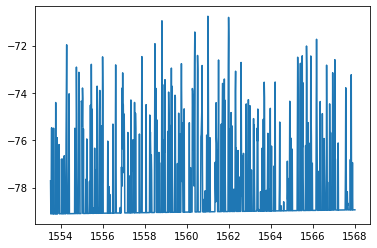

In [73]:
# osa.startosa('a')
osa.stoposa()

In [132]:
rfampPS.activation1 = 1

RF amplifier PS 30V 4A: channel 1 output is turned ON


In [79]:
rfoscPS.activation = 1

Instek GPD-4303S DCSupply: Output activation is turned ON.


In [133]:
rfampPS.printStatus()

------------------------------RF amplifier PS 30V 4A-----------------------------
|-------------------Instek GPP DC Power Supply Status Summary--------------------
|--------------------Model: GPP-1326, Serial No.SN:GET921679---------------------
|	------------Channel Summary-------------
|	 CHANNEL1: Activation ON.
|		 VSET=30.000V, ISET=6.000A.
|		 VOUT=29.996V, IOUT=4.084A.
|		 Output power: 122.501W.
|		 ---Over Voltage/Current Protection Status:---
|		 OVP Status: OFF	 OCP Status: OFF 
|		 OVP Level : 35.0 V	 OCP Level : 7.0 A
-----------------Instek GPP DC Power Supply Status Summary Ends-----------------



'------------------------------RF amplifier PS 30V 4A-----------------------------\n|-------------------Instek GPP DC Power Supply Status Summary--------------------\n|--------------------Model: GPP-1326, Serial No.SN:GET921679---------------------\n|\t------------Channel Summary-------------\n|\t CHANNEL1: Activation \x1bON\x1b.\n|\t\t VSET=30.000V, ISET=6.000A.\n|\t\t VOUT=29.996V, IOUT=4.084A.\n|\t\t Output power: 122.501W.\n|\t\t ---Over Voltage/Current Protection Status:---\n|\t\t OVP Status: OFF\t OCP Status: OFF \n|\t\t OVP Level : 35.0 V\t OCP Level : 7.0 A\n-----------------Instek GPP DC Power Supply Status Summary Ends-----------------\n'

In [68]:
osa.Stop()

Agilent 86142B: Spectrum collection STOPped.


In [1]:
from LFC.Hardware.EatonPDU import EatonPDU
pdu = EatonPDU(addr='ASRL43::INSTR')
pdu.connect()

Eaton PDU epduDC connected
Eaton PDU epduDC: Login failed. You have 4 attempts left.

Ready
+============================================================================+
|                      EATON ePDU Configuration Utility                      |
+============================================================================+
Enter Log
 kecklfc
Enter Pass
 *********
pdu#0
Eaton PDU epduDC: Login succeed.


(1, 1)

In [19]:
from LFC.Hardware.EatonPDU import EatonPDU
pdu_B = EatonPDU(addr='ASRL23::INSTR')
pdu_B.connect()

Eaton PDU epduDC connected
Eaton PDU epduDC: Login failed. You have 4 attempts left.

Ready
+============================================================================+
|                      EATON ePDU Configuration Utility                      |
+============================================================================+
Enter Log
 kecklfc
Enter Pass
 *********
pdu#0
Eaton PDU epduDC: Login succeed.


(1, 1)

In [20]:
pdu_B.get_ipv4_address()

'192.168.0.160'

In [7]:
pdu.set_outlet_on(8)

Eaton PDU epduDC:Passcode matched preset value. Turn on is continued.


'0'

In [18]:
pdu.get_outlet_status(8)

c:\Users\HSFLFC\Desktop\Keck\Keck Comb\LFC\Hardware\EatonPDU.py:98: UserWarning: Eaton PDU epduDC: Not logged in. Try to re-login.
  warnings.warn(self.devicename+": Not logged in. Try to re-login.")


Eaton PDU epduDC: Login failed. You have 4 attempts left.

Ready
+============================================================================+
|                      EATON ePDU Configuration Utility                      |
+============================================================================+
Enter Log
 kecklfc
Enter Pass
 *********
pdu#0
Eaton PDU epduDC: Login succeed.
Eaton PDU epduDC: Last login expired, re-Login succeed.
|			 FriendlyName: Outlet A8
|			 PresentStatus: 1
|			 Switchable: True
|			 Current: 0.0 A
|			 ActivePower: 0.0 W
|			 ApparentPower: 0.0 VA
|			 PowerFactor: 1.0



{'PresentStatus': 1,
 'Switchable': True,
 'FriendlyName': 'Outlet A8',
 'Current_A': 0.0,
 'ActivePower_W': 0.0,
 'ApparentPower_VA': 0.0,
 'PowerFactor': 1.0}

In [30]:
pdu.inst.clear()
pdu.write('get PDU.Input[1].Phase[1].ActivePower')
tt = pdu.inst.read(termination='pdu#0>')
tt

'get PDU.Input[1].Phase[1].ActivePower\n\r\x07547.3\r\n'

In [ ]:
# Overnght thermal test
import time

from LFC.Hardware.USB2408 import USB2408
#initialize device and get temperature
daq = USB2408(addr=0)
daq.connect()
daq2 = USB2408(addr=1)
daq2.connect()


filename = r"C:\Users\HSFLFC\Desktop\Keck\Logs\DAQ_Temperature\DAQ_Temperature_2023_0628_overnight.csv"


with  open(filename,"w") as f:
    #TODO: write table head
    f.write(time.strftime('%Z')+",")
    for ii in daq.thermocouple_positions:
        f.write(ii+",")
    for ii in daq2.thermocouple_positions:
        f.write(ii+",")
    f.write("\n")
while True:
    try:
        with open(filename,"a") as f:
            f.write(time.ctime()+",")

            print("DAQ1 Temp".center(80,'-'))
            Temp = daq.get_temp_all()
            
            for jj in Temp:
                f.write(f"{jj:.5f},")

            print("DAQ2 Temp".center(80,'-'))
            Temp = daq2.get_temp_all()
            for jj in Temp:
                f.write(f"{jj:.5f},")

            f.write("\n")
    except Exception as e:
        print(e)
    time.sleep(2)


In [5]:
from LFC.Hardware.SRS_SIM900 import SRS_SIM900, SRS_PIDcontrol_SIM960
srs = SRS_SIM900(addr="GPIB0::2::INSTR")
srs.connect()
servo1 = SRS_PIDcontrol_SIM960(srs, 3)
servo1.set_manual_output_max(4)
servo1.set_manual_output_min(-4)
servo1.printStatus()

2023-07-21 10:37:57.304 | INFO     | Stanford Research System SIM900 | Device.py:connect:71
Stanford Research System SIM900 connected


2023-07-21 10:38:02.504 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:printStatus:201
----------------------------SRS PID controller SIM960----------------------------
|--------------------SRS PID controller SIM960 Status Summary--------------------
|----------------------------SIM960,s/n033669,ver2.17----------------------------
|	Output mode:	MAN,	Output limit: -4.000V TO 4.000V
|	Measured input:	 0.291595V
|	Amplified error:	 0.046097V
|	Instant Output voltage:	 -2.000554V
|	Manual output set:	 -2.0V
|	================ Set Point related================
|		Internal setpoint = 0.31 V, Ramping OFF
|		Setpoint input mode INT, Ext setpoint input 0.309958V
|		Setpoint RAMP speed = 0.01 V/s, action OFF
|	============= P,I,D and Offset Status=============
|		 P = 2.5    , 	action = ON
|		 I = 1.0 1/s, 	action = ON
|		 D = 1e-05   s, 	action = OFF
|		Off = -1.35  V, 	action = ON
-----------------SRS PID controller SIM960 Status Summary Ends------------------



'----------------------------SRS PID controller SIM960----------------------------\n|--------------------SRS PID controller SIM960 Status Summary--------------------\n|----------------------------SIM960,s/n033669,ver2.17----------------------------\n|\tOutput mode:\t\x1bMAN\x1b,\tOutput limit: -4.000V TO 4.000V\n|\tMeasured input:\t 0.291595V\n|\tAmplified error:\t 0.046097V\n|\tInstant Output voltage:\t -2.000554V\n|\tManual output set:\t -2.0V\n|\t================ Set Point related================\n|\t\tInternal setpoint = 0.31 V, Ramping \x1bOFF\x1b\n|\t\tSetpoint input mode INT, Ext setpoint input 0.309958V\n|\t\tSetpoint RAMP speed = 0.01 V/s, action \x1bOFF\x1b\n|\t============= P,I,D and Offset Status=============\n|\t\t P = 2.5    , \taction = \x1bON\x1b\n|\t\t I = 1.0 1/s, \taction = \x1bON\x1b\n|\t\t D = 1e-05   s, \taction = \x1bOFF\x1b\n|\t\tOff = -1.35  V, \taction = \x1bON\x1b\n-----------------SRS PID controller SIM960 Status Summary Ends------------------\n'

In [26]:
servo1.set_output_lowerlim(-4)
servo1.set_output_upperlim(4)

SRS PID controller SIM960: Setting Output Lower limit in Volt to -4.0.
SRS PID controller SIM960: Setting Output Upper limit in Volt to 4.0.


2023-07-21 10:56:20.607 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_output:666
SRS PID controller SIM960: ....Manual output voltage Ramping.... Disable ranp by set self.manual_output_ramp=0. 
2023-07-21 10:56:20.821 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_output:671
SRS PID controller SIM960: Output in Manual Mode in Volt set to -0.850.
2023-07-21 10:56:21.040 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_output:671
SRS PID controller SIM960: Output in Manual Mode in Volt set to -0.952.
2023-07-21 10:56:21.257 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_output:671
SRS PID controller SIM960: Output in Manual Mode in Volt set to -1.055.
2023-07-21 10:56:21.477 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_output:671
SRS PID controller SIM960: Output in Manual Mode in Volt set to -1.157.
2023-07-21 10:56:21.695 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_outp

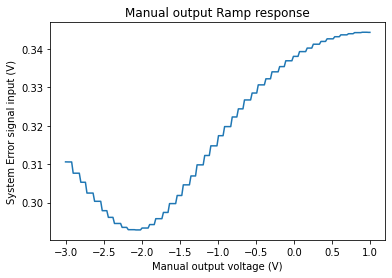

2023-07-21 10:56:54.823 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_output:666
SRS PID controller SIM960: ....Manual output voltage Ramping.... Disable ranp by set self.manual_output_ramp=0. 
2023-07-21 10:56:55.039 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_output:671
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.000.
2023-07-21 10:56:55.260 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_output:671
SRS PID controller SIM960: Output in Manual Mode in Volt set to 0.895.
2023-07-21 10:56:55.481 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_output:671
SRS PID controller SIM960: Output in Manual Mode in Volt set to 0.789.
2023-07-21 10:56:55.698 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_output:671
SRS PID controller SIM960: Output in Manual Mode in Volt set to 0.684.
2023-07-21 10:56:55.915 | INFO     | SRS PID controller SIM960 | SRS_SIM900.py:set_manual_output:6

In [7]:
scan_start = -3
scan_stop = 1
num_steps= 200

servo1.manual_output_ramp=0.1
servo1.manual_output = scan_start

r = servo1.manual_sweep(np.linspace(scan_start,scan_stop,num_steps))

servo1.manual_output=-1

SRS PID controller SIM960: ....Manual output voltage Ramping.... Disable ranp by set self.manual_output_ramp=0. 
SRS PID controller SIM960: Output in Manual Mode in Volt set to -1.200.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -1.306.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -1.412.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -1.518.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -1.624.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -1.729.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -1.835.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -1.941.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -2.047.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -2.153.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -2.259.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -2.365.
SRS PID controller SIM9

100%|██████████| 800/800 [01:52<00:00,  7.09it/s]


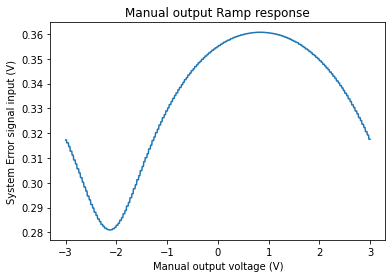

SRS PID controller SIM960: ....Manual output voltage Ramping.... Disable ranp by set self.manual_output_ramp=0. 
SRS PID controller SIM960: Output in Manual Mode in Volt set to 3.000.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 2.898.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 2.795.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 2.693.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 2.590.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 2.488.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 2.385.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 2.283.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 2.180.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 2.078.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.976.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.873.
SRS PID controller SIM960: Output i

In [144]:
scan_start = -3
scan_stop = 3
num_steps= 800

servo1.manual_output_ramp=0.1
servo1.manual_output = scan_start

r = servo1.manual_sweep(np.linspace(scan_start,scan_stop,num_steps))

servo1.manual_output=-1.2

In [5]:
servo_fc = SRS_PIDcontrol_SIM960(srs, 1)

servo_fc.printStatus()

----------------------------SRS PID controller SIM960----------------------------
|--------------------SRS PID controller SIM960 Status Summary--------------------
|----------------------------SIM960,s/n033658,ver2.17----------------------------
|	Output mode:	MAN,	Output limit: -0.500V TO 7.500V
|	Measured input:	 0.426258V
|	Amplified error:	 -99.999999V
|	Instant Output voltage:	 0.000633V
|	Manual output set:	 0.0V
|	================ Set Point related================
|		Internal setpoint = 0.021 V, Ramping OFF
|		Setpoint input mode INT, Ext setpoint input 0.021258V
|		Setpoint RAMP speed = 0.01 V/s, action OFF
|	============= P,I,D and Offset Status=============
|		 P = 30.0    , 	action = ON
|		 I = 0.1 1/s, 	action = OFF
|		 D = 1e-05   s, 	action = OFF
|		Off = 0.3  V, 	action = ON
-----------------SRS PID controller SIM960 Status Summary Ends------------------



'----------------------------SRS PID controller SIM960----------------------------\n|--------------------SRS PID controller SIM960 Status Summary--------------------\n|----------------------------SIM960,s/n033658,ver2.17----------------------------\n|\tOutput mode:\t\x1bMAN\x1b,\tOutput limit: -0.500V TO 7.500V\n|\tMeasured input:\t 0.426258V\n|\tAmplified error:\t -99.999999V\n|\tInstant Output voltage:\t 0.000633V\n|\tManual output set:\t 0.0V\n|\t================ Set Point related================\n|\t\tInternal setpoint = 0.021 V, Ramping \x1bOFF\x1b\n|\t\tSetpoint input mode INT, Ext setpoint input 0.021258V\n|\t\tSetpoint RAMP speed = 0.01 V/s, action \x1bOFF\x1b\n|\t============= P,I,D and Offset Status=============\n|\t\t P = 30.0    , \taction = \x1bON\x1b\n|\t\t I = 0.1 1/s, \taction = \x1bOFF\x1b\n|\t\t D = 1e-05   s, \taction = \x1bOFF\x1b\n|\t\tOff = 0.3  V, \taction = \x1bON\x1b\n-----------------SRS PID controller SIM960 Status Summary Ends------------------\n'

SRS PID controller SIM960: ....Manual output voltage Ramping.... Disable ranp by set self.manual_output_ramp=0. 
SRS PID controller SIM960: Output in Manual Mode in Volt set to 0.000.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -0.125.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -0.250.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -0.375.
SRS PID controller SIM960: Output in Manual Mode in Volt set to -0.500.
SRS PID controller SIM960: ....Manual output voltage Ramp Finished. Disable ramp by set self.manual_output_ramp=0. 
SRS PID controller SIM960: PID output is turned OFF, output mode is turnd to Manual.


100%|██████████| 1000/1000 [02:20<00:00,  7.10it/s]


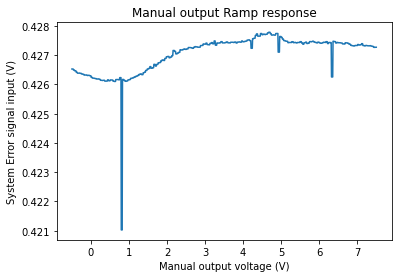

SRS PID controller SIM960: ....Manual output voltage Ramping.... Disable ranp by set self.manual_output_ramp=0. 
SRS PID controller SIM960: Output in Manual Mode in Volt set to 7.500.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 7.399.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 7.297.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 7.196.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 7.095.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 6.993.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 6.892.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 6.791.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 6.689.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 6.588.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 6.486.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 6.385.
SRS PID controller SIM960: Output i

In [41]:
scan_start = -0.5
scan_stop = 7.5
num_steps= 1000

servo_fc.manual_output_ramp=0.1
servo_fc.manual_output = scan_start

r = servo_fc.manual_sweep(np.linspace(scan_start,scan_stop,num_steps))

servo_fc.manual_output=0

SRS PID controller SIM960: ....Manual output voltage Ramping.... Disable ranp by set self.manual_output_ramp=0. 
SRS PID controller SIM960: Output in Manual Mode in Volt set to 0.000.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 0.000.
SRS PID controller SIM960: ....Manual output voltage Ramp Finished. Disable ramp by set self.manual_output_ramp=0. 
SRS PID controller SIM960: PID output is turned OFF, output mode is turnd to Manual.


100%|██████████| 200/200 [00:28<00:00,  6.93it/s]


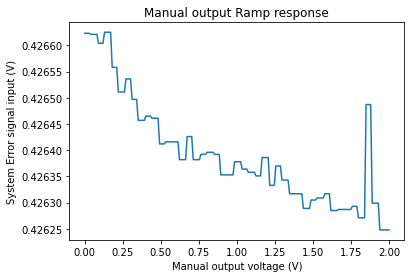

SRS PID controller SIM960: ....Manual output voltage Ramping.... Disable ranp by set self.manual_output_ramp=0. 
SRS PID controller SIM960: Output in Manual Mode in Volt set to 2.000.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.895.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.789.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.684.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.579.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.474.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.368.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.263.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.158.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 1.053.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 0.947.
SRS PID controller SIM960: Output in Manual Mode in Volt set to 0.842.
SRS PID controller SIM960: Output i

In [42]:
scan_start = 0
scan_stop = 2
num_steps= 200

servo_fc.manual_output_ramp=0.1
servo_fc.manual_output = scan_start

r = servo_fc.manual_sweep(np.linspace(scan_start,scan_stop,num_steps))

servo_fc.manual_output=0

In [6]:
from LFC.Hardware.TEC_LFC3751 import TEC_LFC3751
tec_fc = TEC_LFC3751(addr='ASRL41::INSTR', name='Filter Cavity TEC (LFC3751)')
tec_fc.connect()
tec_fc.printStatus()

Filter Cavity TEC (LFC3751) connected
---------------------------Filter Cavity TEC (LFC3751)---------------------------
|--------------------------TEC LFC-3751 Status Summary---------------------------
|----------------------Model: LFI-3751, Serial No.21380415-----------------------
|	Output Status: OFF
|	TE current: -0.00A
|	Temp set: 25.74°C
|	Temp act: 12.96°C
|	 Limit I: 
|		 Positive: 0.00 A
|		 Negative: -0.60 A
|	 Limit T: 
|		 High: 35.10°C
|		 Low: 10.00°C
|	 PID parameters: [30.0, 1.0, 0.0]
|	 ABC thermistor (°C): [10.0, 25.0, 40.0]
------------------------TEC LFC-3751 Status Summary Ends------------------------



'---------------------------Filter Cavity TEC (LFC3751)---------------------------\n|--------------------------TEC LFC-3751 Status Summary---------------------------\n|----------------------Model: LFI-3751, Serial No.21380415-----------------------\n|\tOutput Status: \x1bOFF\x1b\n|\tTE current: -0.00A\n|\tTemp set: 25.74°C\n|\tTemp act: 12.96°C\n|\t Limit I: \n|\t\t Positive: 0.00 A\n|\t\t Negative: -0.60 A\n|\t Limit T: \n|\t\t High: 35.10°C\n|\t\t Low: 10.00°C\n|\t PID parameters: [30.0, 1.0, 0.0]\n|\t ABC thermistor (°C): [10.0, 25.0, 40.0]\n------------------------TEC LFC-3751 Status Summary Ends------------------------\n'

In [8]:
tec_fc.Tset = 25

Filter Cavity TEC (LFC3751): Temperature setted to 25 degC.


In [11]:
tec_fc.output = 1
import time
time.sleep(1)
for ii in range(100):
    print(tec_fc.Tact)
    time.sleep(1)

Filter Cavity TEC (LFC3751): setted Output status as ON.
14.953
15.037
15.206
15.373
15.456
15.621
15.785
15.947
16.027
16.186
16.343
16.499
16.576
16.729
16.88
16.955
17.103
17.249
17.395
17.467
17.609
17.75
17.819
17.958
18.095
18.231
18.298
18.431
18.564
18.629
18.76
18.889
19.017
19.08
19.206
19.331
19.455
19.517
19.639
19.761
19.822
19.942
20.061
20.179
20.238
20.355
20.471
20.529
20.644
20.759
20.872
20.929
21.041
21.153
21.208
21.319
21.429
21.539
21.593
21.702
21.81
21.918
21.971
22.078
22.184
22.237
22.343
22.448
22.552
22.605
22.708
22.812
22.864
22.966
23.068
23.17
23.221
23.322
23.422
23.473
23.573
23.673
23.772
23.822
23.921
24.02
24.069
24.167
24.264
24.361
24.41
24.506
24.6
24.687
24.727
24.796
24.847
24.865
24.885
24.885


In [12]:
servo1.printStatus()

----------------------------SRS PID controller SIM960----------------------------
|--------------------SRS PID controller SIM960 Status Summary--------------------
|----------------------------SIM960,s/n033683,ver2.17----------------------------
|	Output mode:	PID,	Output limit: -4.000V TO 5.000V
|	Measured input:	 0.010821V
|	Amplified error:	 -0.014175V
|	Instant Output voltage:	 0.679224V
|	Manual output set:	 0.0V
|	================ Set Point related================
|		Internal setpoint = 0.0 V, Ramping OFF
|		Setpoint input mode INT, Ext setpoint input 0.001021V
|		Setpoint RAMP speed = 0.01 V/s, action OFF
|	============= P,I,D and Offset Status=============
|		 P = 1.5    , 	action = ON
|		 I = 0.05 1/s, 	action = ON
|		 D = 1.4e-05   s, 	action = OFF
|		Off = 0.0  V, 	action = ON
-----------------SRS PID controller SIM960 Status Summary Ends------------------



'----------------------------SRS PID controller SIM960----------------------------\n|--------------------SRS PID controller SIM960 Status Summary--------------------\n|----------------------------SIM960,s/n033683,ver2.17----------------------------\n|\tOutput mode:\t\x1bPID\x1b,\tOutput limit: -4.000V TO 5.000V\n|\tMeasured input:\t 0.010821V\n|\tAmplified error:\t -0.014175V\n|\tInstant Output voltage:\t 0.679224V\n|\tManual output set:\t 0.0V\n|\t================ Set Point related================\n|\t\tInternal setpoint = 0.0 V, Ramping \x1bOFF\x1b\n|\t\tSetpoint input mode INT, Ext setpoint input 0.001021V\n|\t\tSetpoint RAMP speed = 0.01 V/s, action \x1bOFF\x1b\n|\t============= P,I,D and Offset Status=============\n|\t\t P = 1.5    , \taction = \x1bON\x1b\n|\t\t I = 0.05 1/s, \taction = \x1bON\x1b\n|\t\t D = 1.4e-05   s, \taction = \x1bOFF\x1b\n|\t\tOff = 0.0  V, \taction = \x1bON\x1b\n-----------------SRS PID controller SIM960 Status Summary Ends------------------\n'

In [55]:
from LFC.Hardware.AmonicsEDFA import AmonicsEDFA
amonic23 = AmonicsEDFA(addr='ASRL13::INSTR', name='Amonics EDFA 23 dBm')
amonic23.connect()
# amonic23.printStatus()

Amonics EDFA 23 dBm connected


1

In [56]:
amonic23.printStatus()

-------------------------------Amonics EDFA 23 dBm-------------------------------
|--------------------------Amonics EDFA Status Summary---------------------------
|------------------Model: AEDFA-PM-23-R-FA, Serial No.22020702-------------------
|	InterLock Status: UNLOCKED
|	Case Temperature: 37.00°C
|	Master Activation: ON
|	------------Channel Summary-------------
|	 CHANNEL1: 
|		 Mode: ACC
|		 Set Cur: 80.0 mA
|		 Status: ON
|		 Input Power: 1.753765 mW
|		 Output Power: 5.051322 mW
|		 Internal PD Power: 43.25232 mW
------------------------Amonics EDFA Status Summary Ends------------------------



'-------------------------------Amonics EDFA 23 dBm-------------------------------\n|--------------------------Amonics EDFA Status Summary---------------------------\n|------------------Model: AEDFA-PM-23-R-FA, Serial No.22020702-------------------\n|\tInterLock Status: \x1bUNLOCKED\x1b\n|\tCase Temperature: 37.00°C\n|\tMaster Activation: \x1bON\x1b\n|\t------------Channel Summary-------------\n|\t CHANNEL1: \n|\t\t Mode: ACC\n|\t\t Set Cur: 80.0 mA\n|\t\t Status: \x1bON\x1b\n|\t\t Input Power: 1.753765 mW\n|\t\t Output Power: 5.051322 mW\n|\t\t Internal PD Power: 43.25232 mW\n------------------------Amonics EDFA Status Summary Ends------------------------\n'

In [57]:
amonic23.activation = 0
amonic23.accCh1Status = 0


Amonics EDFA 23 dBm: ......waiting Activation status set to OFF, now ON
Amonics EDFA 23 dBm: setted Activation status as OFF, finished in 0.087 seconds
Amonics EDFA 23 dBm: ......waiting ACC CH1 status set to OFF, now ON
Amonics EDFA 23 dBm: setted ACC CH1 status as OFF, finished in 0.080 seconds
